In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 750)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 1, 1], [1, 0, 1, 0], [1, 1, 0, 0], [0, 0, 1, 0], [0, 1, 0, 1], [1, 1, 0, 1], [0, 1, 1, 1]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:969
number of class2:648

 ****** Running generation 0 ****** 

Population's average fitness: 0.47974 stdev: 0.08365
Best fitness: 0.65492 - size: (2, 13) - species 6 - id 120
Average adjusted fitness: 0.145
Mean genetic distance 2.855, standard deviation 0.495
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 6.272 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53363 stdev: 0.08457
Best fitness: 0.66357 - size: (3, 15) - species 1 - id 333
Average adjusted fitness: 0.191
Mean genetic distance 2.918, standard deviation 0.515
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 7.084 sec (6.678 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54233 stdev: 0.08737
Best fitness: 0.70130 - size: (3, 16) - species 6 - id 499
Average adjusted fitness: 0.177
Mean genetic distance 3.012, standard deviation 0.518
Population of 202 members in 25 species
Total extinctio

Population's average fitness: 0.59731 stdev: 0.09352
Best fitness: 0.75139 - size: (6, 24) - species 30 - id 2246
Average adjusted fitness: 0.210
Mean genetic distance 3.176, standard deviation 0.507
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 9.644 sec (10.744 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60167 stdev: 0.08634
Best fitness: 0.75139 - size: (6, 24) - species 30 - id 2246
Average adjusted fitness: 0.244
Mean genetic distance 3.167, standard deviation 0.512
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 10.761 sec (10.698 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60280 stdev: 0.08804
Best fitness: 0.75139 - size: (6, 24) - species 30 - id 2246
Average adjusted fitness: 0.218
Mean genetic distance 3.190, standard deviation 0.512
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 10.625 sec (10.695 average)

 *

Population's average fitness: 0.60421 stdev: 0.08574
Best fitness: 0.75696 - size: (7, 26) - species 30 - id 5379
Average adjusted fitness: 0.229
Mean genetic distance 3.202, standard deviation 0.590
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 14.590 sec (12.173 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.58944 stdev: 0.09441
Best fitness: 0.75696 - size: (7, 26) - species 30 - id 5379
Average adjusted fitness: 0.234
Mean genetic distance 3.227, standard deviation 0.581
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 13.188 sec (12.362 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.59873 stdev: 0.09077
Best fitness: 0.75696 - size: (7, 26) - species 30 - id 5379
Average adjusted fitness: 0.202
Mean genetic distance 3.205, standard deviation 0.599
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 12.502 sec (12.446 average)

 

Population's average fitness: 0.57700 stdev: 0.10542
Best fitness: 0.75696 - size: (7, 26) - species 30 - id 5379
Average adjusted fitness: 0.216
Mean genetic distance 3.278, standard deviation 0.574
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 12.271 sec (13.347 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.58423 stdev: 0.09458
Best fitness: 0.75696 - size: (7, 26) - species 30 - id 5379
Average adjusted fitness: 0.222
Mean genetic distance 3.242, standard deviation 0.591
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 12.326 sec (13.248 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.59198 stdev: 0.10338
Best fitness: 0.76314 - size: (7, 24) - species 30 - id 11321
Average adjusted fitness: 0.224
Mean genetic distance 3.229, standard deviation 0.612
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 12.730 sec (13.110 average)



Population's average fitness: 0.60362 stdev: 0.09440
Best fitness: 0.76314 - size: (7, 24) - species 30 - id 11321
Average adjusted fitness: 0.244
Mean genetic distance 3.085, standard deviation 0.583
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 15.581 sec (14.775 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.60069 stdev: 0.08529
Best fitness: 0.76314 - size: (7, 24) - species 30 - id 11321
Average adjusted fitness: 0.205
Mean genetic distance 3.090, standard deviation 0.607
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 15.205 sec (14.897 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.59963 stdev: 0.09116
Best fitness: 0.76314 - size: (7, 24) - species 30 - id 11321
Average adjusted fitness: 0.228
Mean genetic distance 3.122, standard deviation 0.589
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 15.125 sec (15.029 average)

Population's average fitness: 0.59996 stdev: 0.08851
Best fitness: 0.76314 - size: (7, 24) - species 30 - id 11321
Average adjusted fitness: 0.205
Mean genetic distance 3.037, standard deviation 0.557
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 14.478 sec (15.464 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.60214 stdev: 0.08711
Best fitness: 0.76314 - size: (7, 24) - species 30 - id 11321
Average adjusted fitness: 0.221
Mean genetic distance 3.058, standard deviation 0.576
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 14.847 sec (15.407 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.60063 stdev: 0.08442
Best fitness: 0.76314 - size: (7, 24) - species 30 - id 11321
Average adjusted fitness: 0.219
Mean genetic distance 3.077, standard deviation 0.553
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 15.877 sec (15.425 averag

Population's average fitness: 0.60928 stdev: 0.09671
Best fitness: 0.77551 - size: (7, 26) - species 30 - id 23321
Average adjusted fitness: 0.259
Mean genetic distance 3.000, standard deviation 0.526
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 15.306 sec (15.093 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.61015 stdev: 0.08972
Best fitness: 0.77551 - size: (7, 26) - species 30 - id 23321
Average adjusted fitness: 0.235
Mean genetic distance 2.996, standard deviation 0.512
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 14.944 sec (15.059 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.60585 stdev: 0.09604
Best fitness: 0.77551 - size: (7, 26) - species 30 - id 23321
Average adjusted fitness: 0.251
Mean genetic distance 2.980, standard deviation 0.518
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 15.338 sec (15.090 averag

Population's average fitness: 0.60483 stdev: 0.08255
Best fitness: 0.77551 - size: (7, 26) - species 87 - id 23321
Average adjusted fitness: 0.216
Mean genetic distance 2.916, standard deviation 0.642
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 16.118 sec (15.638 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.59736 stdev: 0.09265
Best fitness: 0.77551 - size: (7, 26) - species 87 - id 23321
Average adjusted fitness: 0.196
Mean genetic distance 2.912, standard deviation 0.624
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 15.953 sec (15.657 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.59438 stdev: 0.09281
Best fitness: 0.77551 - size: (7, 26) - species 87 - id 23321
Average adjusted fitness: 0.207
Mean genetic distance 2.930, standard deviation 0.603
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 16.301 sec (15.748 average)

Population's average fitness: 0.59681 stdev: 0.08310
Best fitness: 0.77551 - size: (7, 26) - species 87 - id 23321
Average adjusted fitness: 0.219
Mean genetic distance 3.036, standard deviation 0.555
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 17.034 sec (16.280 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.59242 stdev: 0.09541
Best fitness: 0.77551 - size: (7, 26) - species 87 - id 23321
Average adjusted fitness: 0.224
Mean genetic distance 3.033, standard deviation 0.532
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 16.579 sec (16.427 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.59786 stdev: 0.09123
Best fitness: 0.77551 - size: (7, 26) - species 87 - id 23321
Average adjusted fitness: 0.218
Mean genetic distance 3.009, standard deviation 0.521
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 16.213 sec (16.470 averag

Population's average fitness: 0.60911 stdev: 0.09056
Best fitness: 0.77551 - size: (7, 26) - species 87 - id 23321
Average adjusted fitness: 0.252
Mean genetic distance 3.010, standard deviation 0.568
Population of 205 members in 12 species
Total extinctions: 0
Generation time: 17.193 sec (19.182 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.61104 stdev: 0.09417
Best fitness: 0.77551 - size: (7, 26) - species 87 - id 23321
Average adjusted fitness: 0.235
Mean genetic distance 2.998, standard deviation 0.555
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 17.762 sec (19.001 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.61624 stdev: 0.09107
Best fitness: 0.77551 - size: (7, 26) - species 87 - id 23321
Average adjusted fitness: 0.243
Mean genetic distance 2.992, standard deviation 0.541
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 17.841 sec (18.810 averag

Population's average fitness: 0.58754 stdev: 0.11069
Best fitness: 0.77551 - size: (7, 26) - species 87 - id 23321
Average adjusted fitness: 0.213
Mean genetic distance 2.815, standard deviation 0.604
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 18.809 sec (19.049 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.60236 stdev: 0.10107
Best fitness: 0.77551 - size: (7, 26) - species 87 - id 23321
Average adjusted fitness: 0.233
Mean genetic distance 2.817, standard deviation 0.603
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 18.277 sec (18.978 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.62890 stdev: 0.08475
Best fitness: 0.77551 - size: (7, 26) - species 87 - id 23321
Average adjusted fitness: 0.229
Mean genetic distance 2.855, standard deviation 0.605
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 18.350 sec (18.931 averag

Population's average fitness: 0.60685 stdev: 0.10446
Best fitness: 0.77613 - size: (20, 50) - species 104 - id 42584
Average adjusted fitness: 0.237
Mean genetic distance 3.036, standard deviation 0.625
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 19.521 sec (18.892 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.62195 stdev: 0.09874
Best fitness: 0.77613 - size: (20, 50) - species 104 - id 42584
Average adjusted fitness: 0.258
Mean genetic distance 2.962, standard deviation 0.636
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 19.401 sec (19.117 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.61226 stdev: 0.10515
Best fitness: 0.77613 - size: (20, 50) - species 104 - id 42584
Average adjusted fitness: 0.224
Mean genetic distance 2.951, standard deviation 0.630
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 19.202 sec (19.365 

Population's average fitness: 0.60488 stdev: 0.09743
Best fitness: 0.77613 - size: (20, 50) - species 104 - id 42584
Average adjusted fitness: 0.203
Mean genetic distance 2.698, standard deviation 0.472
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 18.711 sec (20.057 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.60296 stdev: 0.10074
Best fitness: 0.77613 - size: (20, 50) - species 104 - id 42584
Average adjusted fitness: 0.238
Mean genetic distance 2.709, standard deviation 0.479
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 18.827 sec (19.892 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.60876 stdev: 0.09764
Best fitness: 0.77613 - size: (20, 50) - species 104 - id 42584
Average adjusted fitness: 0.222
Mean genetic distance 2.716, standard deviation 0.480
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 14.714 sec (19.274 ave

Mean genetic distance 2.762, standard deviation 0.443
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 16.054 sec (15.833 average)

 ****** Running generation 312 ****** 

Population's average fitness: 0.60573 stdev: 0.10662
Best fitness: 0.77798 - size: (30, 66) - species 129 - id 52784
Average adjusted fitness: 0.233
Mean genetic distance 2.766, standard deviation 0.475
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 15.770 sec (15.739 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.62271 stdev: 0.09573
Best fitness: 0.77798 - size: (30, 66) - species 129 - id 52784
Average adjusted fitness: 0.312
Mean genetic distance 2.793, standard deviation 0.489
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 15.293 sec (15.654 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.62359 stdev: 0.09942
Best fitness: 0.77798 - size: (30, 66) - speci

Population's average fitness: 0.61937 stdev: 0.09870
Best fitness: 0.77798 - size: (30, 66) - species 129 - id 52784
Average adjusted fitness: 0.221
Mean genetic distance 2.728, standard deviation 0.449
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 15.442 sec (15.615 average)

 ****** Running generation 336 ****** 

Population's average fitness: 0.61844 stdev: 0.09424
Best fitness: 0.77798 - size: (30, 66) - species 129 - id 52784
Average adjusted fitness: 0.249
Mean genetic distance 2.730, standard deviation 0.448
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 17.750 sec (15.902 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.61310 stdev: 0.10213
Best fitness: 0.77798 - size: (30, 66) - species 129 - id 52784
Average adjusted fitness: 0.239
Mean genetic distance 2.793, standard deviation 0.466
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 16.242 sec (16.012 

Mean genetic distance 3.061, standard deviation 0.494
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 15.254 sec (15.001 average)

 ****** Running generation 359 ****** 

Population's average fitness: 0.61383 stdev: 0.09462
Best fitness: 0.78046 - size: (31, 68) - species 129 - id 60583
Average adjusted fitness: 0.216
Mean genetic distance 3.071, standard deviation 0.507
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 15.797 sec (15.066 average)

 ****** Running generation 360 ****** 

Population's average fitness: 0.60903 stdev: 0.10165
Best fitness: 0.78046 - size: (31, 68) - species 129 - id 60583
Average adjusted fitness: 0.261
Mean genetic distance 3.054, standard deviation 0.511
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 15.874 sec (15.180 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.61083 stdev: 0.10389
Best fitness: 0.78046 - size: (31, 68) - speci

Population's average fitness: 0.59377 stdev: 0.10619
Best fitness: 0.78231 - size: (27, 64) - species 113 - id 63297
Average adjusted fitness: 0.218
Mean genetic distance 3.145, standard deviation 0.561
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 18.267 sec (18.636 average)

 ****** Running generation 383 ****** 

Population's average fitness: 0.60144 stdev: 0.10238
Best fitness: 0.78231 - size: (27, 64) - species 113 - id 63297
Average adjusted fitness: 0.252
Mean genetic distance 3.101, standard deviation 0.583
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 18.417 sec (18.660 average)

 ****** Running generation 384 ****** 

Population's average fitness: 0.60891 stdev: 0.10299
Best fitness: 0.78231 - size: (27, 64) - species 113 - id 63297
Average adjusted fitness: 0.213
Mean genetic distance 3.092, standard deviation 0.572
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 18.704 sec (18.732 

Mean genetic distance 3.081, standard deviation 0.522
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 20.893 sec (20.180 average)

 ****** Running generation 406 ****** 

Population's average fitness: 0.59932 stdev: 0.10104
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.254
Mean genetic distance 3.088, standard deviation 0.524
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 19.847 sec (20.200 average)

 ****** Running generation 407 ****** 

Population's average fitness: 0.60416 stdev: 0.09592
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.257
Mean genetic distance 3.091, standard deviation 0.519
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 20.237 sec (20.121 average)

 ****** Running generation 408 ****** 

Population's average fitness: 0.61288 stdev: 0.09244
Best fitness: 0.78788 - size: (32, 71) - speci

Population's average fitness: 0.60916 stdev: 0.10368
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.247
Mean genetic distance 3.143, standard deviation 0.557
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 22.190 sec (21.834 average)

 ****** Running generation 430 ****** 

Population's average fitness: 0.62131 stdev: 0.08700
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.228
Mean genetic distance 3.154, standard deviation 0.563
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 21.949 sec (21.836 average)

 ****** Running generation 431 ****** 

Population's average fitness: 0.62039 stdev: 0.08901
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.221
Mean genetic distance 3.169, standard deviation 0.556
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 22.326 sec (21.868 

Mean genetic distance 3.220, standard deviation 0.613
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 18.012 sec (18.303 average)

 ****** Running generation 453 ****** 

Population's average fitness: 0.61555 stdev: 0.09859
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.277
Mean genetic distance 3.211, standard deviation 0.615
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 18.891 sec (18.313 average)

 ****** Running generation 454 ****** 

Population's average fitness: 0.62324 stdev: 0.09376
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.223
Mean genetic distance 3.209, standard deviation 0.615
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 18.438 sec (18.267 average)

 ****** Running generation 455 ****** 

Population's average fitness: 0.61916 stdev: 0.08659
Best fitness: 0.78788 - size: (32, 71) - speci

Population's average fitness: 0.60437 stdev: 0.09870
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.222
Mean genetic distance 3.037, standard deviation 0.607
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 16.297 sec (17.681 average)

 ****** Running generation 477 ****** 

Population's average fitness: 0.60895 stdev: 0.09398
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.247
Mean genetic distance 3.033, standard deviation 0.635
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 16.314 sec (17.532 average)

 ****** Running generation 478 ****** 

Population's average fitness: 0.61405 stdev: 0.09039
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.240
Mean genetic distance 3.051, standard deviation 0.618
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 17.046 sec (17.451 

Mean genetic distance 3.088, standard deviation 0.638
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 18.631 sec (19.030 average)

 ****** Running generation 500 ****** 

Population's average fitness: 0.60918 stdev: 0.10063
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.232
Mean genetic distance 3.088, standard deviation 0.638
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 18.598 sec (18.915 average)

 ****** Running generation 501 ****** 

Population's average fitness: 0.60624 stdev: 0.10091
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.254
Mean genetic distance 3.089, standard deviation 0.654
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 18.422 sec (18.903 average)

 ****** Running generation 502 ****** 

Population's average fitness: 0.61413 stdev: 0.09473
Best fitness: 0.78788 - size: (32, 71) - speci

Population's average fitness: 0.59916 stdev: 0.09933
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.209
Mean genetic distance 2.912, standard deviation 0.579
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 18.238 sec (17.794 average)

 ****** Running generation 524 ****** 

Population's average fitness: 0.59848 stdev: 0.09994
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.207
Mean genetic distance 2.913, standard deviation 0.566
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 17.827 sec (17.744 average)

 ****** Running generation 525 ****** 

Population's average fitness: 0.60824 stdev: 0.09378
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.240
Mean genetic distance 2.906, standard deviation 0.569
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 17.598 sec (17.698 av

Population's average fitness: 0.62024 stdev: 0.09486
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.278
Mean genetic distance 3.048, standard deviation 0.569
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 21.507 sec (21.289 average)

 ****** Running generation 548 ****** 

Population's average fitness: 0.61108 stdev: 0.11105
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.237
Mean genetic distance 3.011, standard deviation 0.550
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 21.911 sec (21.423 average)

 ****** Running generation 549 ****** 

Population's average fitness: 0.61323 stdev: 0.10416
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.257
Mean genetic distance 3.025, standard deviation 0.555
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 21.955 sec (21.516 

Mean genetic distance 3.065, standard deviation 0.606
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 23.866 sec (23.415 average)

 ****** Running generation 571 ****** 

Population's average fitness: 0.60515 stdev: 0.09795
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.216
Mean genetic distance 3.060, standard deviation 0.576
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 24.088 sec (23.608 average)

 ****** Running generation 572 ****** 

Population's average fitness: 0.59508 stdev: 0.10820
Best fitness: 0.78788 - size: (32, 71) - species 129 - id 65973
Average adjusted fitness: 0.229
Mean genetic distance 3.045, standard deviation 0.594
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 24.196 sec (23.790 average)

 ****** Running generation 573 ****** 

Population's average fitness: 0.60189 stdev: 0.10935
Best fitness: 0.78788 - size: (32, 71) - speci

Population's average fitness: 0.59130 stdev: 0.10964
Best fitness: 0.79159 - size: (33, 73) - species 129 - id 101439
Average adjusted fitness: 0.206
Mean genetic distance 2.805, standard deviation 0.439
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 23.284 sec (23.708 average)

 ****** Running generation 595 ****** 

Population's average fitness: 0.59168 stdev: 0.11406
Best fitness: 0.79159 - size: (33, 73) - species 129 - id 101439
Average adjusted fitness: 0.214
Mean genetic distance 2.809, standard deviation 0.436
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 23.253 sec (23.679 average)

 ****** Running generation 596 ****** 

Population's average fitness: 0.59284 stdev: 0.10842
Best fitness: 0.79159 - size: (33, 73) - species 129 - id 101439
Average adjusted fitness: 0.216
Mean genetic distance 2.814, standard deviation 0.424
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 23.187 sec (23.6

Mean genetic distance 2.761, standard deviation 0.430
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 24.416 sec (23.188 average)

 ****** Running generation 618 ****** 

Population's average fitness: 0.59682 stdev: 0.10587
Best fitness: 0.79159 - size: (33, 73) - species 129 - id 101439
Average adjusted fitness: 0.216
Mean genetic distance 2.739, standard deviation 0.457
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 23.970 sec (23.240 average)

 ****** Running generation 619 ****** 

Population's average fitness: 0.59156 stdev: 0.11552
Best fitness: 0.79159 - size: (33, 73) - species 129 - id 101439
Average adjusted fitness: 0.215
Mean genetic distance 2.758, standard deviation 0.424
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 23.517 sec (23.392 average)

 ****** Running generation 620 ****** 

Population's average fitness: 0.59659 stdev: 0.11006
Best fitness: 0.79159 - size: (33, 73) - spe

Population's average fitness: 0.60720 stdev: 0.10001
Best fitness: 0.79159 - size: (33, 73) - species 129 - id 101439
Average adjusted fitness: 0.247
Mean genetic distance 2.761, standard deviation 0.399
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 23.369 sec (23.728 average)

 ****** Running generation 642 ****** 

Population's average fitness: 0.59119 stdev: 0.11137
Best fitness: 0.79159 - size: (33, 73) - species 129 - id 101439
Average adjusted fitness: 0.233
Mean genetic distance 2.769, standard deviation 0.400
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 21.982 sec (23.436 average)

 ****** Running generation 643 ****** 

Population's average fitness: 0.59856 stdev: 0.10923
Best fitness: 0.79159 - size: (33, 73) - species 129 - id 101439
Average adjusted fitness: 0.188
Mean genetic distance 2.740, standard deviation 0.427
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 22.846 sec (23.2

Mean genetic distance 2.726, standard deviation 0.403
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 20.404 sec (21.073 average)

 ****** Running generation 665 ****** 

Population's average fitness: 0.58970 stdev: 0.10860
Best fitness: 0.79159 - size: (33, 73) - species 129 - id 101439
Average adjusted fitness: 0.243
Mean genetic distance 2.765, standard deviation 0.406
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 20.810 sec (21.059 average)

 ****** Running generation 666 ****** 

Population's average fitness: 0.60340 stdev: 0.09975
Best fitness: 0.79159 - size: (33, 73) - species 129 - id 101439
Average adjusted fitness: 0.274
Mean genetic distance 2.744, standard deviation 0.433
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 19.937 sec (21.005 average)

 ****** Running generation 667 ****** 

Population's average fitness: 0.60290 stdev: 0.09859
Best fitness: 0.79159 - size: (33, 73) - spe

Population's average fitness: 0.61564 stdev: 0.09419
Best fitness: 0.79159 - size: (33, 73) - species 129 - id 101439
Average adjusted fitness: 0.219
Mean genetic distance 2.789, standard deviation 0.453
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 23.551 sec (23.101 average)

 ****** Running generation 689 ****** 

Population's average fitness: 0.59486 stdev: 0.10307
Best fitness: 0.79159 - size: (33, 73) - species 129 - id 101439
Average adjusted fitness: 0.231
Mean genetic distance 2.801, standard deviation 0.468
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 23.334 sec (23.227 average)

 ****** Running generation 690 ****** 

Population's average fitness: 0.61009 stdev: 0.09496
Best fitness: 0.79159 - size: (33, 73) - species 129 - id 101439
Average adjusted fitness: 0.224
Mean genetic distance 2.809, standard deviation 0.489
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 23.687 sec (23.3

Mean genetic distance 2.839, standard deviation 0.517
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 22.547 sec (23.049 average)

 ****** Running generation 712 ****** 

Population's average fitness: 0.58974 stdev: 0.10744
Best fitness: 0.79159 - size: (33, 73) - species 129 - id 101439
Average adjusted fitness: 0.217
Mean genetic distance 2.835, standard deviation 0.494
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 23.273 sec (23.068 average)

 ****** Running generation 713 ****** 

Population's average fitness: 0.58449 stdev: 0.10458
Best fitness: 0.79159 - size: (33, 73) - species 129 - id 101439
Average adjusted fitness: 0.237
Mean genetic distance 2.796, standard deviation 0.505
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 22.403 sec (22.988 average)

 ****** Running generation 714 ****** 

Population's average fitness: 0.58662 stdev: 0.09979
Best fitness: 0.79159 - size: (33, 73) - spec

Population's average fitness: 0.61169 stdev: 0.09222
Best fitness: 0.79159 - size: (33, 73) - species 129 - id 101439
Average adjusted fitness: 0.221
Mean genetic distance 2.884, standard deviation 0.558
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 24.100 sec (22.346 average)

 ****** Running generation 736 ****** 

Population's average fitness: 0.59062 stdev: 0.10418
Best fitness: 0.79159 - size: (33, 73) - species 129 - id 101439
Average adjusted fitness: 0.212
Mean genetic distance 2.890, standard deviation 0.570
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 22.929 sec (22.383 average)

 ****** Running generation 737 ****** 

Population's average fitness: 0.61432 stdev: 0.10308
Best fitness: 0.79159 - size: (33, 73) - species 129 - id 101439
Average adjusted fitness: 0.252
Mean genetic distance 2.887, standard deviation 0.571
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 23.040 sec (22.5

Population's average fitness: 0.59380 stdev: 0.07637
Best fitness: 0.76005 - size: (5, 19) - species 38 - id 1058
Average adjusted fitness: 0.179
Mean genetic distance 3.217, standard deviation 0.471
Population of 196 members in 45 species
Total extinctions: 0
Generation time: 8.902 sec (8.572 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59690 stdev: 0.08086
Best fitness: 0.76005 - size: (5, 19) - species 38 - id 1058
Average adjusted fitness: 0.289
Mean genetic distance 3.211, standard deviation 0.462
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 9.025 sec (8.762 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59325 stdev: 0.07536
Best fitness: 0.76005 - size: (5, 19) - species 38 - id 1058
Average adjusted fitness: 0.229
Mean genetic distance 3.218, standard deviation 0.452
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 9.106 sec (8.893 average)

 ******

Population's average fitness: 0.63375 stdev: 0.08103
Best fitness: 0.78169 - size: (7, 23) - species 23 - id 3889
Average adjusted fitness: 0.222
Mean genetic distance 3.317, standard deviation 0.505
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 10.858 sec (10.416 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.62839 stdev: 0.08752
Best fitness: 0.78169 - size: (7, 23) - species 23 - id 3889
Average adjusted fitness: 0.243
Mean genetic distance 3.304, standard deviation 0.496
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 10.515 sec (10.472 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.63057 stdev: 0.09184
Best fitness: 0.78169 - size: (7, 23) - species 23 - id 3889
Average adjusted fitness: 0.265
Mean genetic distance 3.300, standard deviation 0.505
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 11.300 sec (10.585 average)

 

Population's average fitness: 0.63710 stdev: 0.09131
Best fitness: 0.80025 - size: (9, 25) - species 10 - id 7229
Average adjusted fitness: 0.216
Mean genetic distance 3.394, standard deviation 0.532
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 12.236 sec (12.185 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.64333 stdev: 0.08752
Best fitness: 0.80025 - size: (9, 25) - species 10 - id 7229
Average adjusted fitness: 0.178
Mean genetic distance 3.383, standard deviation 0.533
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 11.655 sec (12.142 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.62887 stdev: 0.10105
Best fitness: 0.80025 - size: (9, 25) - species 10 - id 7229
Average adjusted fitness: 0.238
Mean genetic distance 3.377, standard deviation 0.521
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 12.226 sec (12.112 average)

 

Population's average fitness: 0.64434 stdev: 0.09564
Best fitness: 0.80025 - size: (9, 25) - species 58 - id 7229
Average adjusted fitness: 0.237
Mean genetic distance 3.276, standard deviation 0.564
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 13.276 sec (13.488 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.64224 stdev: 0.09645
Best fitness: 0.80025 - size: (9, 25) - species 58 - id 7229
Average adjusted fitness: 0.161
Mean genetic distance 3.230, standard deviation 0.589
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 13.551 sec (13.429 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.64023 stdev: 0.09760
Best fitness: 0.80025 - size: (9, 25) - species 58 - id 7229
Average adjusted fitness: 0.211
Mean genetic distance 3.230, standard deviation 0.600
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 13.249 sec (13.396 average)

 

Population's average fitness: 0.63391 stdev: 0.10153
Best fitness: 0.82375 - size: (10, 34) - species 72 - id 13173
Average adjusted fitness: 0.295
Mean genetic distance 3.239, standard deviation 0.621
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 13.258 sec (13.223 average)

 ****** Running generation 106 ****** 

Population's average fitness: 0.62058 stdev: 0.10314
Best fitness: 0.82375 - size: (10, 34) - species 72 - id 13173
Average adjusted fitness: 0.184
Mean genetic distance 3.218, standard deviation 0.619
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 13.993 sec (13.271 average)

 ****** Running generation 107 ****** 

Population's average fitness: 0.61330 stdev: 0.10577
Best fitness: 0.82375 - size: (10, 34) - species 72 - id 13173
Average adjusted fitness: 0.226
Mean genetic distance 3.253, standard deviation 0.586
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 13.207 sec (13.303 ave

Population's average fitness: 0.62277 stdev: 0.09339
Best fitness: 0.82375 - size: (10, 34) - species 72 - id 13173
Average adjusted fitness: 0.221
Mean genetic distance 3.159, standard deviation 0.569
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 13.588 sec (13.400 average)

 ****** Running generation 130 ****** 

Population's average fitness: 0.62790 stdev: 0.08913
Best fitness: 0.82375 - size: (10, 34) - species 72 - id 13173
Average adjusted fitness: 0.154
Mean genetic distance 3.137, standard deviation 0.562
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 13.305 sec (13.378 average)

 ****** Running generation 131 ****** 

Population's average fitness: 0.62070 stdev: 0.09497
Best fitness: 0.82375 - size: (10, 34) - species 72 - id 13173
Average adjusted fitness: 0.313
Mean genetic distance 3.085, standard deviation 0.530
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 13.318 sec (13.384 ave

Population's average fitness: 0.63766 stdev: 0.10737
Best fitness: 0.82375 - size: (10, 34) - species 92 - id 13173
Average adjusted fitness: 0.311
Mean genetic distance 3.058, standard deviation 0.487
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 13.018 sec (13.325 average)

 ****** Running generation 154 ****** 

Population's average fitness: 0.64435 stdev: 0.09594
Best fitness: 0.82375 - size: (10, 34) - species 92 - id 13173
Average adjusted fitness: 0.176
Mean genetic distance 3.066, standard deviation 0.478
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 13.275 sec (13.342 average)

 ****** Running generation 155 ****** 

Population's average fitness: 0.63362 stdev: 0.10483
Best fitness: 0.82375 - size: (10, 34) - species 92 - id 13173
Average adjusted fitness: 0.308
Mean genetic distance 3.056, standard deviation 0.496
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 13.025 sec (13.273 ave

Population's average fitness: 0.64856 stdev: 0.09508
Best fitness: 0.82375 - size: (10, 34) - species 92 - id 13173
Average adjusted fitness: 0.251
Mean genetic distance 3.071, standard deviation 0.507
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 12.834 sec (13.053 average)

 ****** Running generation 178 ****** 

Population's average fitness: 0.63792 stdev: 0.10282
Best fitness: 0.82375 - size: (10, 34) - species 92 - id 13173
Average adjusted fitness: 0.262
Mean genetic distance 3.058, standard deviation 0.528
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 13.002 sec (13.014 average)

 ****** Running generation 179 ****** 

Population's average fitness: 0.63504 stdev: 0.10188
Best fitness: 0.82375 - size: (10, 34) - species 92 - id 13173
Average adjusted fitness: 0.295
Mean genetic distance 3.065, standard deviation 0.551
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 12.824 sec (12.995 ave

Population's average fitness: 0.62863 stdev: 0.09577
Best fitness: 0.83550 - size: (12, 34) - species 57 - id 29563
Average adjusted fitness: 0.205
Mean genetic distance 3.154, standard deviation 0.596
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 12.506 sec (13.041 average)

 ****** Running generation 202 ****** 

Population's average fitness: 0.63546 stdev: 0.09641
Best fitness: 0.83550 - size: (12, 34) - species 57 - id 29563
Average adjusted fitness: 0.175
Mean genetic distance 3.143, standard deviation 0.611
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 12.754 sec (13.007 average)

 ****** Running generation 203 ****** 

Population's average fitness: 0.63636 stdev: 0.09420
Best fitness: 0.83550 - size: (12, 34) - species 57 - id 29563
Average adjusted fitness: 0.187
Mean genetic distance 3.122, standard deviation 0.618
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 12.955 sec (12.962 ave

Population's average fitness: 0.64124 stdev: 0.09861
Best fitness: 0.83550 - size: (12, 34) - species 57 - id 29563
Average adjusted fitness: 0.186
Mean genetic distance 3.057, standard deviation 0.518
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 13.125 sec (13.278 average)

 ****** Running generation 226 ****** 

Population's average fitness: 0.63352 stdev: 0.09752
Best fitness: 0.83550 - size: (12, 34) - species 57 - id 29563
Average adjusted fitness: 0.221
Mean genetic distance 3.073, standard deviation 0.527
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 13.701 sec (13.347 average)

 ****** Running generation 227 ****** 

Population's average fitness: 0.64520 stdev: 0.09896
Best fitness: 0.83550 - size: (12, 34) - species 57 - id 29563
Average adjusted fitness: 0.248
Mean genetic distance 3.076, standard deviation 0.529
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 13.512 sec (13.364 ave

Population's average fitness: 0.64585 stdev: 0.10503
Best fitness: 0.83550 - size: (12, 34) - species 57 - id 29563
Average adjusted fitness: 0.263
Mean genetic distance 2.937, standard deviation 0.506
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 15.749 sec (15.050 average)

 ****** Running generation 250 ****** 

Population's average fitness: 0.65267 stdev: 0.10317
Best fitness: 0.83550 - size: (12, 34) - species 57 - id 29563
Average adjusted fitness: 0.303
Mean genetic distance 2.914, standard deviation 0.498
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 14.649 sec (15.045 average)

 ****** Running generation 251 ****** 

Population's average fitness: 0.64409 stdev: 0.10703
Best fitness: 0.83550 - size: (12, 34) - species 57 - id 29563
Average adjusted fitness: 0.225
Mean genetic distance 2.905, standard deviation 0.505
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 14.562 sec (14.996 ave

Population's average fitness: 0.63629 stdev: 0.10354
Best fitness: 0.83550 - size: (12, 34) - species 57 - id 29563
Average adjusted fitness: 0.256
Mean genetic distance 2.979, standard deviation 0.524
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 16.493 sec (16.026 average)

 ****** Running generation 274 ****** 

Population's average fitness: 0.63795 stdev: 0.11032
Best fitness: 0.83550 - size: (12, 34) - species 57 - id 29563
Average adjusted fitness: 0.327
Mean genetic distance 2.958, standard deviation 0.533
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 16.921 sec (16.190 average)

 ****** Running generation 275 ****** 

Population's average fitness: 0.64239 stdev: 0.10654
Best fitness: 0.83550 - size: (12, 34) - species 57 - id 29563
Average adjusted fitness: 0.264
Mean genetic distance 2.998, standard deviation 0.515
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 16.811 sec (16.303 ave

Population's average fitness: 0.64395 stdev: 0.10019
Best fitness: 0.83550 - size: (12, 34) - species 57 - id 29563
Average adjusted fitness: 0.193
Mean genetic distance 2.848, standard deviation 0.516
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 17.622 sec (17.488 average)

 ****** Running generation 298 ****** 

Population's average fitness: 0.64963 stdev: 0.10145
Best fitness: 0.83550 - size: (12, 34) - species 57 - id 29563
Average adjusted fitness: 0.204
Mean genetic distance 2.903, standard deviation 0.480
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 17.167 sec (17.556 average)

 ****** Running generation 299 ****** 

Population's average fitness: 0.64542 stdev: 0.10485
Best fitness: 0.83550 - size: (12, 34) - species 57 - id 29563
Average adjusted fitness: 0.262
Mean genetic distance 2.903, standard deviation 0.496
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 17.607 sec (17.610 aver

Population's average fitness: 0.65013 stdev: 0.10568
Best fitness: 0.83550 - size: (12, 34) - species 57 - id 29563
Average adjusted fitness: 0.205
Mean genetic distance 2.906, standard deviation 0.522
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 18.594 sec (17.895 average)

 ****** Running generation 322 ****** 

Population's average fitness: 0.64428 stdev: 0.10281
Best fitness: 0.83550 - size: (12, 34) - species 57 - id 29563
Average adjusted fitness: 0.194
Mean genetic distance 2.892, standard deviation 0.533
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 18.373 sec (18.027 average)

 ****** Running generation 323 ****** 

Population's average fitness: 0.67132 stdev: 0.10604
Best fitness: 0.83550 - size: (12, 34) - species 57 - id 29563
Average adjusted fitness: 0.225
Mean genetic distance 2.906, standard deviation 0.522
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 18.917 sec (18.122 ave

Population's average fitness: 0.65050 stdev: 0.10123
Best fitness: 0.83921 - size: (15, 38) - species 149 - id 54627
Average adjusted fitness: 0.225
Mean genetic distance 2.900, standard deviation 0.527
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 15.756 sec (16.073 average)

 ****** Running generation 346 ****** 

Population's average fitness: 0.65236 stdev: 0.10042
Best fitness: 0.83921 - size: (15, 38) - species 149 - id 54627
Average adjusted fitness: 0.195
Mean genetic distance 2.905, standard deviation 0.526
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 15.131 sec (15.969 average)

 ****** Running generation 347 ****** 

Population's average fitness: 0.65876 stdev: 0.10615
Best fitness: 0.83921 - size: (15, 38) - species 149 - id 54627
Average adjusted fitness: 0.242
Mean genetic distance 2.934, standard deviation 0.537
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 15.496 sec (15.847 

Mean genetic distance 3.056, standard deviation 0.507
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 16.549 sec (16.556 average)

 ****** Running generation 369 ****** 

Population's average fitness: 0.66763 stdev: 0.10909
Best fitness: 0.85220 - size: (17, 41) - species 170 - id 59725
Average adjusted fitness: 0.284
Mean genetic distance 3.047, standard deviation 0.516
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 16.538 sec (16.619 average)

 ****** Running generation 370 ****** 

Population's average fitness: 0.66911 stdev: 0.10721
Best fitness: 0.85220 - size: (17, 41) - species 170 - id 59725
Average adjusted fitness: 0.196
Mean genetic distance 3.008, standard deviation 0.517
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 16.777 sec (16.737 average)

 ****** Running generation 371 ****** 

Population's average fitness: 0.66452 stdev: 0.10696
Best fitness: 0.85220 - size: (17, 41) - speci

Population's average fitness: 0.66101 stdev: 0.11329
Best fitness: 0.85220 - size: (17, 41) - species 170 - id 59725
Average adjusted fitness: 0.303
Mean genetic distance 2.884, standard deviation 0.479
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 15.945 sec (15.700 average)

 ****** Running generation 393 ****** 

Population's average fitness: 0.66958 stdev: 0.10299
Best fitness: 0.85220 - size: (17, 41) - species 170 - id 59725
Average adjusted fitness: 0.287
Mean genetic distance 2.866, standard deviation 0.491
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 16.222 sec (15.739 average)

 ****** Running generation 394 ****** 

Population's average fitness: 0.66176 stdev: 0.11315
Best fitness: 0.85220 - size: (17, 41) - species 170 - id 59725
Average adjusted fitness: 0.290
Mean genetic distance 2.891, standard deviation 0.492
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 16.554 sec (15.877 

Mean genetic distance 2.955, standard deviation 0.459
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 18.600 sec (17.741 average)

 ****** Running generation 416 ****** 

Population's average fitness: 0.67457 stdev: 0.11313
Best fitness: 0.85591 - size: (17, 42) - species 170 - id 66118
Average adjusted fitness: 0.207
Mean genetic distance 2.940, standard deviation 0.475
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 18.198 sec (17.771 average)

 ****** Running generation 417 ****** 

Population's average fitness: 0.68313 stdev: 0.10586
Best fitness: 0.85591 - size: (17, 42) - species 170 - id 66118
Average adjusted fitness: 0.238
Mean genetic distance 2.891, standard deviation 0.504
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 17.620 sec (17.797 average)

 ****** Running generation 418 ****** 

Population's average fitness: 0.67202 stdev: 0.10873
Best fitness: 0.85591 - size: (17, 42) - speci

Population's average fitness: 0.67506 stdev: 0.10983
Best fitness: 0.85714 - size: (18, 44) - species 170 - id 72710
Average adjusted fitness: 0.203
Mean genetic distance 2.715, standard deviation 0.417
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 17.585 sec (17.855 average)

 ****** Running generation 440 ****** 

Population's average fitness: 0.66165 stdev: 0.11718
Best fitness: 0.85714 - size: (18, 44) - species 170 - id 72710
Average adjusted fitness: 0.267
Mean genetic distance 2.733, standard deviation 0.419
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 18.514 sec (17.824 average)

 ****** Running generation 441 ****** 

Population's average fitness: 0.66112 stdev: 0.11432
Best fitness: 0.86147 - size: (19, 44) - species 174 - id 73420
Average adjusted fitness: 0.310
Mean genetic distance 2.743, standard deviation 0.417
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 18.083 sec (17.823 

Mean genetic distance 2.690, standard deviation 0.461
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 18.579 sec (18.693 average)

 ****** Running generation 463 ****** 

Population's average fitness: 0.65418 stdev: 0.10320
Best fitness: 0.86147 - size: (19, 44) - species 174 - id 73420
Average adjusted fitness: 0.173
Mean genetic distance 2.718, standard deviation 0.442
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 19.021 sec (18.675 average)

 ****** Running generation 464 ****** 

Population's average fitness: 0.66141 stdev: 0.11159
Best fitness: 0.86147 - size: (19, 44) - species 174 - id 73420
Average adjusted fitness: 0.248
Mean genetic distance 2.743, standard deviation 0.423
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 18.638 sec (18.678 average)

 ****** Running generation 465 ****** 

Population's average fitness: 0.65616 stdev: 0.11311
Best fitness: 0.86147 - size: (19, 44) - speci

Population's average fitness: 0.65243 stdev: 0.10646
Best fitness: 0.86147 - size: (19, 44) - species 174 - id 73420
Average adjusted fitness: 0.286
Mean genetic distance 2.675, standard deviation 0.402
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 19.627 sec (19.294 average)

 ****** Running generation 487 ****** 

Population's average fitness: 0.66450 stdev: 0.09801
Best fitness: 0.86147 - size: (19, 44) - species 174 - id 73420
Average adjusted fitness: 0.193
Mean genetic distance 2.663, standard deviation 0.388
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 19.537 sec (19.365 average)

 ****** Running generation 488 ****** 

Population's average fitness: 0.66987 stdev: 0.10498
Best fitness: 0.86147 - size: (19, 44) - species 174 - id 73420
Average adjusted fitness: 0.247
Mean genetic distance 2.614, standard deviation 0.381
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 19.654 sec (19.447 

Mean genetic distance 2.735, standard deviation 0.409
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 20.005 sec (19.857 average)

 ****** Running generation 510 ****** 

Population's average fitness: 0.67148 stdev: 0.10671
Best fitness: 0.86147 - size: (19, 44) - species 174 - id 73420
Average adjusted fitness: 0.257
Mean genetic distance 2.739, standard deviation 0.394
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 20.179 sec (19.851 average)

 ****** Running generation 511 ****** 

Population's average fitness: 0.66992 stdev: 0.11133
Best fitness: 0.86147 - size: (19, 44) - species 174 - id 73420
Average adjusted fitness: 0.232
Mean genetic distance 2.728, standard deviation 0.393
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 20.506 sec (19.901 average)

 ****** Running generation 512 ****** 

Population's average fitness: 0.66358 stdev: 0.11416
Best fitness: 0.86147 - size: (19, 44) - speci

Population's average fitness: 0.67636 stdev: 0.10451
Best fitness: 0.86147 - size: (19, 44) - species 174 - id 73420
Average adjusted fitness: 0.228
Mean genetic distance 2.681, standard deviation 0.387
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 20.498 sec (21.014 average)

 ****** Running generation 534 ****** 

Population's average fitness: 0.66727 stdev: 0.11039
Best fitness: 0.86147 - size: (19, 44) - species 174 - id 73420
Average adjusted fitness: 0.303
Mean genetic distance 2.655, standard deviation 0.414
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 21.517 sec (20.961 average)

 ****** Running generation 535 ****** 

Population's average fitness: 0.67460 stdev: 0.10847
Best fitness: 0.86147 - size: (19, 44) - species 174 - id 73420
Average adjusted fitness: 0.228
Mean genetic distance 2.593, standard deviation 0.430
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 20.981 sec (20.956 

Population's average fitness: 0.68028 stdev: 0.10913
Best fitness: 0.86147 - size: (19, 44) - species 174 - id 73420
Average adjusted fitness: 0.266
Mean genetic distance 2.699, standard deviation 0.404
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 20.978 sec (21.977 average)

 ****** Running generation 558 ****** 

Population's average fitness: 0.67091 stdev: 0.11388
Best fitness: 0.86147 - size: (19, 44) - species 174 - id 73420
Average adjusted fitness: 0.308
Mean genetic distance 2.696, standard deviation 0.405
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 20.948 sec (21.901 average)

 ****** Running generation 559 ****** 

Population's average fitness: 0.67131 stdev: 0.10781
Best fitness: 0.86147 - size: (19, 44) - species 174 - id 73420
Average adjusted fitness: 0.301
Mean genetic distance 2.713, standard deviation 0.411
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 21.771 sec (21.906 

Mean genetic distance 2.770, standard deviation 0.422
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 21.647 sec (21.105 average)

 ****** Running generation 581 ****** 

Population's average fitness: 0.68763 stdev: 0.10080
Best fitness: 0.86147 - size: (19, 44) - species 174 - id 73420
Average adjusted fitness: 0.290
Mean genetic distance 2.789, standard deviation 0.410
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 21.686 sec (21.234 average)

 ****** Running generation 582 ****** 

Population's average fitness: 0.67111 stdev: 0.11054
Best fitness: 0.86147 - size: (19, 44) - species 174 - id 73420
Average adjusted fitness: 0.236
Mean genetic distance 2.737, standard deviation 0.445
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 21.547 sec (21.334 average)

 ****** Running generation 583 ****** 

Population's average fitness: 0.67722 stdev: 0.10523
Best fitness: 0.86147 - size: (19, 44) - speci

Population's average fitness: 0.65891 stdev: 0.11425
Best fitness: 0.86147 - size: (26, 61) - species 244 - id 101349
Average adjusted fitness: 0.289
Mean genetic distance 2.762, standard deviation 0.447
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 21.445 sec (22.134 average)

 ****** Running generation 605 ****** 

Population's average fitness: 0.65284 stdev: 0.11013
Best fitness: 0.86147 - size: (26, 61) - species 244 - id 101349
Average adjusted fitness: 0.263
Mean genetic distance 2.777, standard deviation 0.448
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 21.754 sec (22.020 average)

 ****** Running generation 606 ****** 

Population's average fitness: 0.66745 stdev: 0.10597
Best fitness: 0.86147 - size: (19, 44) - species 253 - id 73420
Average adjusted fitness: 0.213
Mean genetic distance 2.783, standard deviation 0.444
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 21.007 sec (21.85

Mean genetic distance 2.836, standard deviation 0.529
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 19.270 sec (19.818 average)

 ****** Running generation 628 ****** 

Population's average fitness: 0.66223 stdev: 0.10874
Best fitness: 0.86147 - size: (19, 44) - species 253 - id 73420
Average adjusted fitness: 0.237
Mean genetic distance 2.822, standard deviation 0.543
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 19.324 sec (19.736 average)

 ****** Running generation 629 ****** 

Population's average fitness: 0.65393 stdev: 0.10869
Best fitness: 0.86147 - size: (19, 44) - species 253 - id 73420
Average adjusted fitness: 0.205
Mean genetic distance 2.828, standard deviation 0.537
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 19.464 sec (19.723 average)

 ****** Running generation 630 ****** 

Population's average fitness: 0.65521 stdev: 0.11069
Best fitness: 0.86147 - size: (19, 44) - species

Population's average fitness: 0.65996 stdev: 0.11345
Best fitness: 0.86147 - size: (19, 44) - species 253 - id 73420
Average adjusted fitness: 0.255
Mean genetic distance 2.814, standard deviation 0.474
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 18.640 sec (18.912 average)

 ****** Running generation 652 ****** 

Population's average fitness: 0.66479 stdev: 0.11375
Best fitness: 0.86147 - size: (19, 44) - species 253 - id 73420
Average adjusted fitness: 0.260
Mean genetic distance 2.819, standard deviation 0.459
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 18.993 sec (18.888 average)

 ****** Running generation 653 ****** 

Population's average fitness: 0.65602 stdev: 0.11502
Best fitness: 0.86147 - size: (19, 44) - species 253 - id 73420
Average adjusted fitness: 0.238
Mean genetic distance 2.783, standard deviation 0.496
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 18.594 sec (18.861 

Mean genetic distance 2.765, standard deviation 0.494
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 20.091 sec (19.799 average)

 ****** Running generation 675 ****** 

Population's average fitness: 0.66134 stdev: 0.10625
Best fitness: 0.86147 - size: (19, 44) - species 253 - id 73420
Average adjusted fitness: 0.268
Mean genetic distance 2.773, standard deviation 0.486
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 20.097 sec (19.875 average)

 ****** Running generation 676 ****** 

Population's average fitness: 0.66055 stdev: 0.10794
Best fitness: 0.86147 - size: (19, 44) - species 253 - id 73420
Average adjusted fitness: 0.238
Mean genetic distance 2.778, standard deviation 0.481
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 20.087 sec (19.909 average)

 ****** Running generation 677 ****** 

Population's average fitness: 0.66992 stdev: 0.10255
Best fitness: 0.86147 - size: (19, 44) - speci

Population's average fitness: 0.66433 stdev: 0.10828
Best fitness: 0.86147 - size: (19, 44) - species 253 - id 73420
Average adjusted fitness: 0.273
Mean genetic distance 2.755, standard deviation 0.470
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 19.469 sec (19.650 average)

 ****** Running generation 699 ****** 

Population's average fitness: 0.66046 stdev: 0.10698
Best fitness: 0.86147 - size: (19, 44) - species 253 - id 73420
Average adjusted fitness: 0.269
Mean genetic distance 2.739, standard deviation 0.465
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 19.463 sec (19.663 average)

 ****** Running generation 700 ****** 

Population's average fitness: 0.66906 stdev: 0.10882
Best fitness: 0.86147 - size: (19, 44) - species 253 - id 73420
Average adjusted fitness: 0.306
Mean genetic distance 2.700, standard deviation 0.451
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 19.902 sec (19.700 a

Population's average fitness: 0.66349 stdev: 0.10940
Best fitness: 0.86147 - size: (19, 44) - species 253 - id 73420
Average adjusted fitness: 0.241
Mean genetic distance 2.601, standard deviation 0.442
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 21.960 sec (21.306 average)

 ****** Running generation 723 ****** 

Population's average fitness: 0.66066 stdev: 0.11035
Best fitness: 0.86147 - size: (19, 44) - species 253 - id 73420
Average adjusted fitness: 0.266
Mean genetic distance 2.617, standard deviation 0.460
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 21.810 sec (21.401 average)

 ****** Running generation 724 ****** 

Population's average fitness: 0.65138 stdev: 0.11318
Best fitness: 0.86147 - size: (19, 44) - species 253 - id 73420
Average adjusted fitness: 0.186
Mean genetic distance 2.655, standard deviation 0.450
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 21.962 sec (21.540 

Mean genetic distance 2.708, standard deviation 0.481
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 18.266 sec (18.467 average)

 ****** Running generation 746 ****** 

Population's average fitness: 0.66157 stdev: 0.10990
Best fitness: 0.86147 - size: (19, 44) - species 253 - id 73420
Average adjusted fitness: 0.186
Mean genetic distance 2.749, standard deviation 0.475
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 17.500 sec (18.289 average)

 ****** Running generation 747 ****** 

Population's average fitness: 0.67264 stdev: 0.10562
Best fitness: 0.86147 - size: (19, 44) - species 253 - id 73420
Average adjusted fitness: 0.281
Mean genetic distance 2.754, standard deviation 0.492
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 17.658 sec (18.157 average)

 ****** Running generation 748 ****** 

Population's average fitness: 0.67158 stdev: 0.10204
Best fitness: 0.86147 - size: (19, 44) - specie

Mean genetic distance 3.209, standard deviation 0.514
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 9.741 sec (9.429 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64192 stdev: 0.10303
Best fitness: 0.82375 - size: (10, 29) - species 21 - id 1915
Average adjusted fitness: 0.237
Mean genetic distance 3.210, standard deviation 0.527
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 9.803 sec (9.482 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.64106 stdev: 0.10280
Best fitness: 0.82375 - size: (10, 29) - species 21 - id 1915
Average adjusted fitness: 0.289
Mean genetic distance 3.208, standard deviation 0.517
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 10.148 sec (9.553 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.63643 stdev: 0.11291
Best fitness: 0.82375 - size: (10, 29) - species 21 - id 1

Mean genetic distance 3.240, standard deviation 0.568
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 10.755 sec (10.767 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.64850 stdev: 0.11557
Best fitness: 0.83364 - size: (11, 33) - species 4 - id 3716
Average adjusted fitness: 0.395
Mean genetic distance 3.273, standard deviation 0.614
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 10.940 sec (10.794 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.65855 stdev: 0.11343
Best fitness: 0.83364 - size: (11, 33) - species 4 - id 3716
Average adjusted fitness: 0.328
Mean genetic distance 3.259, standard deviation 0.590
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 11.187 sec (10.887 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.63593 stdev: 0.11984
Best fitness: 0.83364 - size: (11, 33) - species 4 - id

Mean genetic distance 3.273, standard deviation 0.544
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 11.877 sec (12.002 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.66073 stdev: 0.11944
Best fitness: 0.84292 - size: (16, 39) - species 16 - id 8060
Average adjusted fitness: 0.269
Mean genetic distance 3.273, standard deviation 0.551
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 11.856 sec (11.970 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.66871 stdev: 0.11393
Best fitness: 0.84292 - size: (16, 39) - species 16 - id 8060
Average adjusted fitness: 0.267
Mean genetic distance 3.281, standard deviation 0.557
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 12.294 sec (11.996 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.66038 stdev: 0.12138
Best fitness: 0.84292 - size: (16, 39) - species 16 -

Mean genetic distance 3.145, standard deviation 0.568
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 12.546 sec (12.247 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.67112 stdev: 0.12840
Best fitness: 0.84292 - size: (16, 39) - species 16 - id 8060
Average adjusted fitness: 0.433
Mean genetic distance 3.132, standard deviation 0.554
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 12.610 sec (12.268 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.66445 stdev: 0.12617
Best fitness: 0.84292 - size: (16, 39) - species 16 - id 8060
Average adjusted fitness: 0.429
Mean genetic distance 3.143, standard deviation 0.559
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 12.584 sec (12.295 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.66695 stdev: 0.12801
Best fitness: 0.84292 - size: (16, 39) - species 16 -

Population's average fitness: 0.68251 stdev: 0.12379
Best fitness: 0.84292 - size: (16, 39) - species 16 - id 8060
Average adjusted fitness: 0.401
Mean genetic distance 3.006, standard deviation 0.504
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 13.263 sec (13.866 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.67520 stdev: 0.12683
Best fitness: 0.84292 - size: (16, 39) - species 16 - id 8060
Average adjusted fitness: 0.444
Mean genetic distance 3.000, standard deviation 0.524
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 13.968 sec (13.831 average)

 ****** Running generation 117 ****** 

Population's average fitness: 0.66107 stdev: 0.13556
Best fitness: 0.84292 - size: (16, 39) - species 16 - id 8060
Average adjusted fitness: 0.403
Mean genetic distance 2.980, standard deviation 0.529
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 13.502 sec (13.775 averag

Population's average fitness: 0.67802 stdev: 0.12664
Best fitness: 0.84416 - size: (19, 39) - species 69 - id 20593
Average adjusted fitness: 0.326
Mean genetic distance 3.115, standard deviation 0.576
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 14.804 sec (14.544 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.67038 stdev: 0.12752
Best fitness: 0.84416 - size: (19, 39) - species 69 - id 20593
Average adjusted fitness: 0.351
Mean genetic distance 3.090, standard deviation 0.594
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 14.761 sec (14.659 average)

 ****** Running generation 141 ****** 

Population's average fitness: 0.67050 stdev: 0.13382
Best fitness: 0.84416 - size: (19, 39) - species 69 - id 20593
Average adjusted fitness: 0.427
Mean genetic distance 3.086, standard deviation 0.602
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 14.820 sec (14.714 ave

Population's average fitness: 0.70660 stdev: 0.12435
Best fitness: 0.84416 - size: (20, 40) - species 74 - id 25310
Average adjusted fitness: 0.473
Mean genetic distance 3.043, standard deviation 0.537
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 16.090 sec (16.360 average)

 ****** Running generation 164 ****** 

Population's average fitness: 0.70830 stdev: 0.12035
Best fitness: 0.84416 - size: (20, 40) - species 74 - id 25310
Average adjusted fitness: 0.400
Mean genetic distance 3.061, standard deviation 0.528
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 16.592 sec (16.415 average)

 ****** Running generation 165 ****** 

Population's average fitness: 0.71023 stdev: 0.12025
Best fitness: 0.84416 - size: (20, 40) - species 74 - id 25310
Average adjusted fitness: 0.468
Mean genetic distance 3.068, standard deviation 0.535
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 16.532 sec (16.431 ave

Population's average fitness: 0.69690 stdev: 0.11908
Best fitness: 0.84416 - size: (20, 40) - species 74 - id 25310
Average adjusted fitness: 0.430
Mean genetic distance 2.977, standard deviation 0.547
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 17.080 sec (17.132 average)

 ****** Running generation 188 ****** 

Population's average fitness: 0.69449 stdev: 0.11937
Best fitness: 0.84416 - size: (20, 40) - species 74 - id 25310
Average adjusted fitness: 0.409
Mean genetic distance 2.962, standard deviation 0.528
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 17.156 sec (17.189 average)

 ****** Running generation 189 ****** 

Population's average fitness: 0.69926 stdev: 0.11753
Best fitness: 0.84416 - size: (20, 40) - species 74 - id 25310
Average adjusted fitness: 0.458
Mean genetic distance 2.965, standard deviation 0.532
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 20.317 sec (17.474 ave

Population's average fitness: 0.69655 stdev: 0.11812
Best fitness: 0.84663 - size: (33, 66) - species 87 - id 35381
Average adjusted fitness: 0.405
Mean genetic distance 2.852, standard deviation 0.478
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 18.219 sec (17.700 average)

 ****** Running generation 212 ****** 

Population's average fitness: 0.68049 stdev: 0.12109
Best fitness: 0.84663 - size: (33, 66) - species 87 - id 35381
Average adjusted fitness: 0.404
Mean genetic distance 2.848, standard deviation 0.486
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 18.501 sec (17.743 average)

 ****** Running generation 213 ****** 

Population's average fitness: 0.68823 stdev: 0.12560
Best fitness: 0.84663 - size: (33, 66) - species 87 - id 35381
Average adjusted fitness: 0.393
Mean genetic distance 2.852, standard deviation 0.491
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 17.945 sec (17.694 ave

Population's average fitness: 0.69561 stdev: 0.12803
Best fitness: 0.84663 - size: (33, 66) - species 87 - id 35381
Average adjusted fitness: 0.446
Mean genetic distance 2.756, standard deviation 0.434
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 16.729 sec (17.417 average)

 ****** Running generation 236 ****** 

Population's average fitness: 0.69313 stdev: 0.12613
Best fitness: 0.84663 - size: (33, 66) - species 87 - id 35381
Average adjusted fitness: 0.310
Mean genetic distance 2.766, standard deviation 0.415
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 16.912 sec (17.401 average)

 ****** Running generation 237 ****** 

Population's average fitness: 0.68598 stdev: 0.13269
Best fitness: 0.84663 - size: (33, 66) - species 87 - id 35381
Average adjusted fitness: 0.351
Mean genetic distance 2.777, standard deviation 0.424
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 16.981 sec (17.365 ave

Population's average fitness: 0.68434 stdev: 0.12576
Best fitness: 0.84663 - size: (33, 66) - species 87 - id 35381
Average adjusted fitness: 0.401
Mean genetic distance 2.756, standard deviation 0.482
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 22.518 sec (17.579 average)

 ****** Running generation 260 ****** 

Population's average fitness: 0.67224 stdev: 0.13556
Best fitness: 0.84663 - size: (33, 66) - species 87 - id 35381
Average adjusted fitness: 0.389
Mean genetic distance 2.689, standard deviation 0.458
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 26.165 sec (18.388 average)

 ****** Running generation 261 ****** 

Population's average fitness: 0.69107 stdev: 0.12583
Best fitness: 0.84663 - size: (33, 66) - species 87 - id 35381
Average adjusted fitness: 0.293
Mean genetic distance 2.717, standard deviation 0.428
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 19.408 sec (18.562 avera

Population's average fitness: 0.67560 stdev: 0.13065
Best fitness: 0.84663 - size: (33, 66) - species 87 - id 35381
Average adjusted fitness: 0.440
Mean genetic distance 2.755, standard deviation 0.394
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 18.324 sec (17.479 average)

 ****** Running generation 284 ****** 

Population's average fitness: 0.67623 stdev: 0.12880
Best fitness: 0.84663 - size: (33, 66) - species 87 - id 35381
Average adjusted fitness: 0.357
Mean genetic distance 2.736, standard deviation 0.414
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 17.636 sec (17.510 average)

 ****** Running generation 285 ****** 

Population's average fitness: 0.68828 stdev: 0.11413
Best fitness: 0.84663 - size: (33, 66) - species 87 - id 35381
Average adjusted fitness: 0.263
Mean genetic distance 2.726, standard deviation 0.435
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 17.500 sec (17.559 ave

Population's average fitness: 0.68306 stdev: 0.12640
Best fitness: 0.84663 - size: (33, 66) - species 87 - id 35381
Average adjusted fitness: 0.393
Mean genetic distance 2.772, standard deviation 0.428
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 21.017 sec (20.707 average)

 ****** Running generation 308 ****** 

Population's average fitness: 0.68777 stdev: 0.11961
Best fitness: 0.84663 - size: (33, 66) - species 87 - id 35381
Average adjusted fitness: 0.419
Mean genetic distance 2.801, standard deviation 0.402
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 20.261 sec (20.821 average)

 ****** Running generation 309 ****** 

Population's average fitness: 0.67986 stdev: 0.13319
Best fitness: 0.84663 - size: (33, 66) - species 87 - id 35381
Average adjusted fitness: 0.409
Mean genetic distance 2.802, standard deviation 0.383
Population of 205 members in 12 species
Total extinctions: 0
Generation time: 20.399 sec (20.924 ave

Population's average fitness: 0.69015 stdev: 0.11996
Best fitness: 0.84725 - size: (35, 71) - species 87 - id 53428
Average adjusted fitness: 0.400
Mean genetic distance 2.758, standard deviation 0.418
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 25.885 sec (25.215 average)

 ****** Running generation 332 ****** 

Population's average fitness: 0.69568 stdev: 0.11697
Best fitness: 0.84725 - size: (35, 71) - species 87 - id 53428
Average adjusted fitness: 0.335
Mean genetic distance 2.754, standard deviation 0.436
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 29.405 sec (25.838 average)

 ****** Running generation 333 ****** 

Population's average fitness: 0.69588 stdev: 0.11641
Best fitness: 0.84725 - size: (35, 71) - species 87 - id 53428
Average adjusted fitness: 0.347
Mean genetic distance 2.745, standard deviation 0.441
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 23.391 sec (25.819 ave

Population's average fitness: 0.68982 stdev: 0.11983
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.303
Mean genetic distance 2.812, standard deviation 0.456
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 30.024 sec (30.173 average)

 ****** Running generation 356 ****** 

Population's average fitness: 0.68277 stdev: 0.12991
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.387
Mean genetic distance 2.812, standard deviation 0.471
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 26.425 sec (29.919 average)

 ****** Running generation 357 ****** 

Population's average fitness: 0.68520 stdev: 0.12696
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.279
Mean genetic distance 2.790, standard deviation 0.453
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 26.494 sec (29.596 

Population's average fitness: 0.67105 stdev: 0.13515
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.417
Mean genetic distance 2.848, standard deviation 0.479
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 26.162 sec (28.451 average)

 ****** Running generation 380 ****** 

Population's average fitness: 0.68055 stdev: 0.12266
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.351
Mean genetic distance 2.855, standard deviation 0.470
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 28.207 sec (28.730 average)

 ****** Running generation 381 ****** 

Population's average fitness: 0.68748 stdev: 0.12853
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.452
Mean genetic distance 2.855, standard deviation 0.492
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 27.671 sec (28.866 ave

Mean genetic distance 2.940, standard deviation 0.515
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 26.229 sec (24.686 average)

 ****** Running generation 403 ****** 

Population's average fitness: 0.66599 stdev: 0.13223
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.427
Mean genetic distance 2.920, standard deviation 0.523
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 33.609 sec (26.027 average)

 ****** Running generation 404 ****** 

Population's average fitness: 0.66890 stdev: 0.14553
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.430
Mean genetic distance 2.892, standard deviation 0.530
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 29.359 sec (26.941 average)

 ****** Running generation 405 ****** 

Population's average fitness: 0.69074 stdev: 0.12274
Best fitness: 0.84725 - size: (35, 71) - speci

Population's average fitness: 0.66557 stdev: 0.13766
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.423
Mean genetic distance 2.910, standard deviation 0.542
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 22.270 sec (20.297 average)

 ****** Running generation 427 ****** 

Population's average fitness: 0.66124 stdev: 0.14103
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.430
Mean genetic distance 2.890, standard deviation 0.559
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 22.018 sec (20.281 average)

 ****** Running generation 428 ****** 

Population's average fitness: 0.67592 stdev: 0.13128
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.451
Mean genetic distance 2.914, standard deviation 0.545
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 19.635 sec (20.364 

Mean genetic distance 2.850, standard deviation 0.497
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 21.556 sec (22.361 average)

 ****** Running generation 450 ****** 

Population's average fitness: 0.67851 stdev: 0.13487
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.444
Mean genetic distance 2.856, standard deviation 0.492
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 19.371 sec (22.114 average)

 ****** Running generation 451 ****** 

Population's average fitness: 0.67263 stdev: 0.13477
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.426
Mean genetic distance 2.860, standard deviation 0.499
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 20.356 sec (21.988 average)

 ****** Running generation 452 ****** 

Population's average fitness: 0.68464 stdev: 0.12586
Best fitness: 0.84725 - size: (35, 71) - speci

Population's average fitness: 0.66238 stdev: 0.13408
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.375
Mean genetic distance 2.909, standard deviation 0.597
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 20.188 sec (21.896 average)

 ****** Running generation 474 ****** 

Population's average fitness: 0.65790 stdev: 0.13730
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.427
Mean genetic distance 2.904, standard deviation 0.575
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 20.784 sec (21.959 average)

 ****** Running generation 475 ****** 

Population's average fitness: 0.66726 stdev: 0.14150
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.418
Mean genetic distance 2.904, standard deviation 0.568
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 20.947 sec (21.905 

Mean genetic distance 2.850, standard deviation 0.581
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 21.915 sec (21.269 average)

 ****** Running generation 497 ****** 

Population's average fitness: 0.68043 stdev: 0.13320
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.455
Mean genetic distance 2.815, standard deviation 0.586
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 20.477 sec (21.338 average)

 ****** Running generation 498 ****** 

Population's average fitness: 0.66593 stdev: 0.12663
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.375
Mean genetic distance 2.820, standard deviation 0.573
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 25.224 sec (21.825 average)

 ****** Running generation 499 ****** 

Population's average fitness: 0.67430 stdev: 0.13351
Best fitness: 0.84725 - size: (35, 71) - species 

Population's average fitness: 0.67712 stdev: 0.14157
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.444
Mean genetic distance 2.732, standard deviation 0.416
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 17.378 sec (17.668 average)

 ****** Running generation 521 ****** 

Population's average fitness: 0.66526 stdev: 0.13346
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.385
Mean genetic distance 2.756, standard deviation 0.414
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 18.208 sec (17.580 average)

 ****** Running generation 522 ****** 

Population's average fitness: 0.68027 stdev: 0.13724
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.460
Mean genetic distance 2.759, standard deviation 0.421
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 17.950 sec (17.664 

Mean genetic distance 2.746, standard deviation 0.463
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 18.031 sec (18.117 average)

 ****** Running generation 544 ****** 

Population's average fitness: 0.69335 stdev: 0.13336
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.449
Mean genetic distance 2.754, standard deviation 0.479
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 19.521 sec (18.031 average)

 ****** Running generation 545 ****** 

Population's average fitness: 0.68498 stdev: 0.13184
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.455
Mean genetic distance 2.746, standard deviation 0.489
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 20.162 sec (18.327 average)

 ****** Running generation 546 ****** 

Population's average fitness: 0.69195 stdev: 0.13461
Best fitness: 0.84725 - size: (35, 71) - speci

Population's average fitness: 0.67312 stdev: 0.14573
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.430
Mean genetic distance 2.796, standard deviation 0.457
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 19.283 sec (19.887 average)

 ****** Running generation 568 ****** 

Population's average fitness: 0.68824 stdev: 0.12771
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.453
Mean genetic distance 2.791, standard deviation 0.472
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 19.118 sec (19.655 average)

 ****** Running generation 569 ****** 

Population's average fitness: 0.68552 stdev: 0.12489
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.297
Mean genetic distance 2.817, standard deviation 0.481
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 20.083 sec (19.536 av

Mean genetic distance 2.716, standard deviation 0.489
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 18.582 sec (20.425 average)

 ****** Running generation 591 ****** 

Population's average fitness: 0.69842 stdev: 0.12834
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.393
Mean genetic distance 2.740, standard deviation 0.486
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 20.232 sec (20.464 average)

 ****** Running generation 592 ****** 

Population's average fitness: 0.69738 stdev: 0.13319
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.414
Mean genetic distance 2.754, standard deviation 0.490
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 18.459 sec (20.009 average)

 ****** Running generation 593 ****** 

Population's average fitness: 0.68864 stdev: 0.12995
Best fitness: 0.84725 - size: (35, 71) - speci

Population's average fitness: 0.67949 stdev: 0.13515
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.440
Mean genetic distance 2.909, standard deviation 0.515
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 16.115 sec (17.419 average)

 ****** Running generation 615 ****** 

Population's average fitness: 0.70227 stdev: 0.12543
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.442
Mean genetic distance 2.932, standard deviation 0.505
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 16.199 sec (17.018 average)

 ****** Running generation 616 ****** 

Population's average fitness: 0.69962 stdev: 0.12480
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.309
Mean genetic distance 2.946, standard deviation 0.543
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 16.818 sec (16.663 

Mean genetic distance 2.889, standard deviation 0.452
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 23.061 sec (23.120 average)

 ****** Running generation 638 ****** 

Population's average fitness: 0.69821 stdev: 0.12465
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.431
Mean genetic distance 2.889, standard deviation 0.473
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 21.374 sec (23.204 average)

 ****** Running generation 639 ****** 

Population's average fitness: 0.66592 stdev: 0.14553
Best fitness: 0.84725 - size: (35, 71) - species 136 - id 53428
Average adjusted fitness: 0.383
Mean genetic distance 2.871, standard deviation 0.492
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 19.315 sec (22.750 average)

 ****** Running generation 640 ****** 

Population's average fitness: 0.68755 stdev: 0.12857
Best fitness: 0.84725 - size: (35, 71) - speci

Population's average fitness: 0.71093 stdev: 0.12343
Best fitness: 0.85158 - size: (29, 58) - species 235 - id 114324
Average adjusted fitness: 0.355
Mean genetic distance 2.934, standard deviation 0.518
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 16.953 sec (19.847 average)

 ****** Running generation 662 ****** 

Population's average fitness: 0.70434 stdev: 0.12717
Best fitness: 0.85158 - size: (29, 58) - species 235 - id 114324
Average adjusted fitness: 0.472
Mean genetic distance 2.947, standard deviation 0.501
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 16.701 sec (19.365 average)

 ****** Running generation 663 ****** 

Population's average fitness: 0.70109 stdev: 0.13135
Best fitness: 0.85158 - size: (29, 58) - species 235 - id 114324
Average adjusted fitness: 0.415
Mean genetic distance 2.940, standard deviation 0.500
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 16.529 sec (18.9

Mean genetic distance 2.956, standard deviation 0.526
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 16.200 sec (17.712 average)

 ****** Running generation 685 ****** 

Population's average fitness: 0.69125 stdev: 0.13397
Best fitness: 0.85281 - size: (30, 59) - species 235 - id 118798
Average adjusted fitness: 0.392
Mean genetic distance 2.952, standard deviation 0.533
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 16.768 sec (17.316 average)

 ****** Running generation 686 ****** 

Population's average fitness: 0.70726 stdev: 0.13349
Best fitness: 0.85281 - size: (30, 59) - species 235 - id 118798
Average adjusted fitness: 0.383
Mean genetic distance 2.950, standard deviation 0.540
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 16.791 sec (16.714 average)

 ****** Running generation 687 ****** 

Population's average fitness: 0.72187 stdev: 0.12204
Best fitness: 0.85281 - size: (30, 59) - spec

Population's average fitness: 0.70161 stdev: 0.13248
Best fitness: 0.85405 - size: (30, 62) - species 235 - id 123093
Average adjusted fitness: 0.384
Mean genetic distance 2.884, standard deviation 0.482
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 20.760 sec (22.549 average)

 ****** Running generation 709 ****** 

Population's average fitness: 0.70380 stdev: 0.13652
Best fitness: 0.85405 - size: (30, 62) - species 235 - id 123093
Average adjusted fitness: 0.381
Mean genetic distance 2.845, standard deviation 0.496
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 20.493 sec (22.549 average)

 ****** Running generation 710 ****** 

Population's average fitness: 0.69719 stdev: 0.13534
Best fitness: 0.85405 - size: (30, 62) - species 235 - id 123093
Average adjusted fitness: 0.376
Mean genetic distance 2.852, standard deviation 0.509
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 22.479 sec (22.5

Mean genetic distance 2.862, standard deviation 0.487
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 19.104 sec (23.002 average)

 ****** Running generation 732 ****** 

Population's average fitness: 0.69823 stdev: 0.12703
Best fitness: 0.85405 - size: (30, 62) - species 235 - id 123093
Average adjusted fitness: 0.334
Mean genetic distance 2.880, standard deviation 0.482
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 21.703 sec (22.810 average)

 ****** Running generation 733 ****** 

Population's average fitness: 0.69672 stdev: 0.12065
Best fitness: 0.85405 - size: (30, 62) - species 235 - id 123093
Average adjusted fitness: 0.338
Mean genetic distance 2.893, standard deviation 0.482
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 20.221 sec (22.519 average)

 ****** Running generation 734 ****** 

Population's average fitness: 0.69051 stdev: 0.14336
Best fitness: 0.85405 - size: (30, 62) - spec

Population's average fitness: 0.58430 stdev: 0.11620
Best fitness: 0.81818 - size: (3, 15) - species 1 - id 1019
Average adjusted fitness: 0.311
Mean genetic distance 3.061, standard deviation 0.516
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 8.779 sec (8.129 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58750 stdev: 0.12196
Best fitness: 0.82004 - size: (3, 16) - species 1 - id 1169
Average adjusted fitness: 0.309
Mean genetic distance 3.067, standard deviation 0.497
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 8.874 sec (8.236 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60018 stdev: 0.11951
Best fitness: 0.82004 - size: (3, 16) - species 1 - id 1169
Average adjusted fitness: 0.313
Mean genetic distance 3.115, standard deviation 0.490
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 8.488 sec (8.267 average)

 ****** Runn

Population's average fitness: 0.63120 stdev: 0.13653
Best fitness: 0.83179 - size: (5, 17) - species 1 - id 3464
Average adjusted fitness: 0.267
Mean genetic distance 3.317, standard deviation 0.520
Population of 204 members in 24 species
Total extinctions: 0
Generation time: 12.791 sec (11.477 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.65476 stdev: 0.11574
Best fitness: 0.83179 - size: (5, 17) - species 1 - id 3464
Average adjusted fitness: 0.266
Mean genetic distance 3.282, standard deviation 0.526
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 15.943 sec (12.012 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.63704 stdev: 0.13890
Best fitness: 0.83426 - size: (9, 25) - species 18 - id 4754
Average adjusted fitness: 0.318
Mean genetic distance 3.299, standard deviation 0.520
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 14.009 sec (12.350 average)

 **

Population's average fitness: 0.65316 stdev: 0.13899
Best fitness: 0.84601 - size: (11, 31) - species 18 - id 8092
Average adjusted fitness: 0.298
Mean genetic distance 3.310, standard deviation 0.553
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 15.510 sec (16.447 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.64751 stdev: 0.14082
Best fitness: 0.84601 - size: (11, 31) - species 18 - id 8092
Average adjusted fitness: 0.353
Mean genetic distance 3.302, standard deviation 0.568
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 18.386 sec (17.108 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.64352 stdev: 0.14955
Best fitness: 0.84601 - size: (11, 31) - species 18 - id 8092
Average adjusted fitness: 0.327
Mean genetic distance 3.330, standard deviation 0.554
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 18.808 sec (17.351 average)

Population's average fitness: 0.66422 stdev: 0.14367
Best fitness: 0.85034 - size: (13, 35) - species 18 - id 9448
Average adjusted fitness: 0.345
Mean genetic distance 3.214, standard deviation 0.588
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 13.773 sec (15.372 average)

 ****** Running generation 78 ****** 

Population's average fitness: 0.66017 stdev: 0.13924
Best fitness: 0.85034 - size: (13, 35) - species 18 - id 9448
Average adjusted fitness: 0.335
Mean genetic distance 3.221, standard deviation 0.592
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 12.832 sec (15.069 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.66892 stdev: 0.13634
Best fitness: 0.85034 - size: (13, 35) - species 18 - id 9448
Average adjusted fitness: 0.263
Mean genetic distance 3.216, standard deviation 0.600
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 15.956 sec (15.085 average)

Population's average fitness: 0.68187 stdev: 0.14393
Best fitness: 0.85529 - size: (13, 39) - species 37 - id 13517
Average adjusted fitness: 0.469
Mean genetic distance 3.189, standard deviation 0.643
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 16.137 sec (17.930 average)

 ****** Running generation 102 ****** 

Population's average fitness: 0.65593 stdev: 0.15355
Best fitness: 0.85529 - size: (13, 39) - species 37 - id 13517
Average adjusted fitness: 0.362
Mean genetic distance 3.199, standard deviation 0.628
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 15.229 sec (17.483 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.68168 stdev: 0.14389
Best fitness: 0.85529 - size: (13, 39) - species 37 - id 13517
Average adjusted fitness: 0.491
Mean genetic distance 3.181, standard deviation 0.641
Population of 194 members in 14 species
Total extinctions: 0
Generation time: 19.563 sec (17.825 ave

Population's average fitness: 0.67153 stdev: 0.16391
Best fitness: 0.85529 - size: (15, 42) - species 66 - id 19557
Average adjusted fitness: 0.465
Mean genetic distance 2.999, standard deviation 0.546
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 20.018 sec (18.912 average)

 ****** Running generation 126 ****** 

Population's average fitness: 0.66205 stdev: 0.16681
Best fitness: 0.85529 - size: (15, 42) - species 66 - id 19557
Average adjusted fitness: 0.294
Mean genetic distance 3.007, standard deviation 0.547
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 18.214 sec (19.148 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.66342 stdev: 0.16590
Best fitness: 0.85529 - size: (15, 42) - species 66 - id 19557
Average adjusted fitness: 0.319
Mean genetic distance 3.010, standard deviation 0.548
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 15.814 sec (18.956 ave

Population's average fitness: 0.68457 stdev: 0.16519
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.288
Mean genetic distance 2.968, standard deviation 0.470
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 11.967 sec (12.992 average)

 ****** Running generation 150 ****** 

Population's average fitness: 0.68798 stdev: 0.16494
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.294
Mean genetic distance 2.972, standard deviation 0.453
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 14.311 sec (13.199 average)

 ****** Running generation 151 ****** 

Population's average fitness: 0.68005 stdev: 0.16260
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.266
Mean genetic distance 2.963, standard deviation 0.484
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 11.735 sec (13.054 ave

Population's average fitness: 0.71097 stdev: 0.15557
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.311
Mean genetic distance 3.022, standard deviation 0.477
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 17.714 sec (17.032 average)

 ****** Running generation 174 ****** 

Population's average fitness: 0.71206 stdev: 0.15250
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.316
Mean genetic distance 3.013, standard deviation 0.493
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 17.216 sec (17.224 average)

 ****** Running generation 175 ****** 

Population's average fitness: 0.71252 stdev: 0.15864
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.312
Mean genetic distance 3.024, standard deviation 0.493
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 17.290 sec (17.390 ave

Population's average fitness: 0.69161 stdev: 0.15705
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.288
Mean genetic distance 3.070, standard deviation 0.498
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 16.191 sec (16.656 average)

 ****** Running generation 198 ****** 

Population's average fitness: 0.67367 stdev: 0.16300
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.321
Mean genetic distance 3.059, standard deviation 0.504
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 16.398 sec (16.585 average)

 ****** Running generation 199 ****** 

Population's average fitness: 0.69459 stdev: 0.15730
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.290
Mean genetic distance 3.066, standard deviation 0.502
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 16.294 sec (16.531 ave

Population's average fitness: 0.67965 stdev: 0.16556
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.289
Mean genetic distance 2.934, standard deviation 0.495
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 14.067 sec (16.223 average)

 ****** Running generation 222 ****** 

Population's average fitness: 0.68543 stdev: 0.16825
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.282
Mean genetic distance 2.959, standard deviation 0.489
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 13.712 sec (15.171 average)

 ****** Running generation 223 ****** 

Population's average fitness: 0.67800 stdev: 0.16529
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.280
Mean genetic distance 2.970, standard deviation 0.490
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 13.983 sec (14.762 ave

Population's average fitness: 0.68238 stdev: 0.17487
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.285
Mean genetic distance 3.028, standard deviation 0.507
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 12.558 sec (13.371 average)

 ****** Running generation 246 ****** 

Population's average fitness: 0.69748 stdev: 0.16699
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.382
Mean genetic distance 3.032, standard deviation 0.508
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 11.978 sec (13.132 average)

 ****** Running generation 247 ****** 

Population's average fitness: 0.71012 stdev: 0.15545
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.304
Mean genetic distance 3.037, standard deviation 0.518
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 12.385 sec (12.950 ave

Population's average fitness: 0.67242 stdev: 0.17455
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.271
Mean genetic distance 2.873, standard deviation 0.543
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 12.874 sec (13.042 average)

 ****** Running generation 270 ****** 

Population's average fitness: 0.68297 stdev: 0.17293
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.347
Mean genetic distance 2.903, standard deviation 0.538
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 12.921 sec (13.047 average)

 ****** Running generation 271 ****** 

Population's average fitness: 0.67787 stdev: 0.16525
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.288
Mean genetic distance 2.884, standard deviation 0.541
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 13.202 sec (13.043 ave

Population's average fitness: 0.67832 stdev: 0.16991
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.298
Mean genetic distance 2.830, standard deviation 0.482
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 12.065 sec (12.373 average)

 ****** Running generation 294 ****** 

Population's average fitness: 0.68248 stdev: 0.16528
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.279
Mean genetic distance 2.811, standard deviation 0.497
Population of 196 members in 10 species
Total extinctions: 0
Generation time: 11.135 sec (12.257 average)

 ****** Running generation 295 ****** 

Population's average fitness: 0.66877 stdev: 0.17396
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.288
Mean genetic distance 2.809, standard deviation 0.479
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 11.545 sec (12.144 ave

Population's average fitness: 0.65911 stdev: 0.17678
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.344
Mean genetic distance 2.813, standard deviation 0.463
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 12.523 sec (13.084 average)

 ****** Running generation 318 ****** 

Population's average fitness: 0.67646 stdev: 0.16253
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.304
Mean genetic distance 2.809, standard deviation 0.445
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 12.838 sec (13.115 average)

 ****** Running generation 319 ****** 

Population's average fitness: 0.69203 stdev: 0.15164
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.295
Mean genetic distance 2.821, standard deviation 0.500
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 12.660 sec (13.091 ave

Population's average fitness: 0.69386 stdev: 0.16348
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.276
Mean genetic distance 2.939, standard deviation 0.513
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 13.382 sec (13.545 average)

 ****** Running generation 342 ****** 

Population's average fitness: 0.68878 stdev: 0.16544
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.272
Mean genetic distance 2.937, standard deviation 0.529
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 13.135 sec (13.488 average)

 ****** Running generation 343 ****** 

Population's average fitness: 0.68160 stdev: 0.17186
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.267
Mean genetic distance 2.928, standard deviation 0.534
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 12.849 sec (13.450 ave

Population's average fitness: 0.67545 stdev: 0.16819
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.275
Mean genetic distance 2.827, standard deviation 0.505
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 12.569 sec (12.607 average)

 ****** Running generation 366 ****** 

Population's average fitness: 0.69665 stdev: 0.16240
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.365
Mean genetic distance 2.820, standard deviation 0.482
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 12.869 sec (12.644 average)

 ****** Running generation 367 ****** 

Population's average fitness: 0.68604 stdev: 0.16107
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.287
Mean genetic distance 2.805, standard deviation 0.495
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 12.187 sec (12.533 ave

Population's average fitness: 0.70722 stdev: 0.15539
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.305
Mean genetic distance 2.828, standard deviation 0.496
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 12.960 sec (13.172 average)

 ****** Running generation 390 ****** 

Population's average fitness: 0.71794 stdev: 0.15169
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.317
Mean genetic distance 2.814, standard deviation 0.479
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 12.993 sec (13.168 average)

 ****** Running generation 391 ****** 

Population's average fitness: 0.69600 stdev: 0.16774
Best fitness: 0.86024 - size: (17, 46) - species 74 - id 22414
Average adjusted fitness: 0.322
Mean genetic distance 2.805, standard deviation 0.472
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 13.490 sec (12.906 ave

Population's average fitness: 0.69205 stdev: 0.16721
Best fitness: 0.86085 - size: (29, 65) - species 168 - id 70398
Average adjusted fitness: 0.288
Mean genetic distance 2.790, standard deviation 0.474
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 12.564 sec (13.348 average)

 ****** Running generation 414 ****** 

Population's average fitness: 0.67749 stdev: 0.16814
Best fitness: 0.86085 - size: (29, 65) - species 168 - id 70398
Average adjusted fitness: 0.273
Mean genetic distance 2.837, standard deviation 0.472
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 12.841 sec (13.214 average)

 ****** Running generation 415 ****** 

Population's average fitness: 0.67593 stdev: 0.17271
Best fitness: 0.86085 - size: (29, 65) - species 168 - id 70398
Average adjusted fitness: 0.259
Mean genetic distance 2.874, standard deviation 0.468
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 12.977 sec (13.142 a

Mean genetic distance 2.792, standard deviation 0.493
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 13.171 sec (12.862 average)

 ****** Running generation 437 ****** 

Population's average fitness: 0.68480 stdev: 0.16470
Best fitness: 0.86518 - size: (30, 68) - species 168 - id 72206
Average adjusted fitness: 0.401
Mean genetic distance 2.808, standard deviation 0.496
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 13.338 sec (12.928 average)

 ****** Running generation 438 ****** 

Population's average fitness: 0.67383 stdev: 0.16143
Best fitness: 0.86518 - size: (30, 68) - species 168 - id 72206
Average adjusted fitness: 0.284
Mean genetic distance 2.831, standard deviation 0.461
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 13.731 sec (13.086 average)

 ****** Running generation 439 ****** 

Population's average fitness: 0.67472 stdev: 0.16905
Best fitness: 0.86518 - size: (30, 68) - species

Population's average fitness: 0.68419 stdev: 0.16571
Best fitness: 0.86518 - size: (30, 68) - species 168 - id 72206
Average adjusted fitness: 0.283
Mean genetic distance 2.867, standard deviation 0.443
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 15.512 sec (15.291 average)

 ****** Running generation 461 ****** 

Population's average fitness: 0.68918 stdev: 0.16304
Best fitness: 0.86518 - size: (30, 68) - species 168 - id 72206
Average adjusted fitness: 0.302
Mean genetic distance 2.886, standard deviation 0.460
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 15.603 sec (15.317 average)

 ****** Running generation 462 ****** 

Population's average fitness: 0.71004 stdev: 0.15122
Best fitness: 0.86518 - size: (30, 68) - species 168 - id 72206
Average adjusted fitness: 0.303
Mean genetic distance 2.875, standard deviation 0.460
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 15.246 sec (15.279 

Mean genetic distance 2.888, standard deviation 0.524
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 14.032 sec (13.895 average)

 ****** Running generation 484 ****** 

Population's average fitness: 0.72032 stdev: 0.16093
Best fitness: 0.86518 - size: (30, 68) - species 168 - id 72206
Average adjusted fitness: 0.329
Mean genetic distance 2.904, standard deviation 0.489
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 13.243 sec (13.805 average)

 ****** Running generation 485 ****** 

Population's average fitness: 0.67554 stdev: 0.17697
Best fitness: 0.86518 - size: (30, 68) - species 168 - id 72206
Average adjusted fitness: 0.347
Mean genetic distance 2.909, standard deviation 0.502
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 13.414 sec (13.781 average)

 ****** Running generation 486 ****** 

Population's average fitness: 0.68124 stdev: 0.17365
Best fitness: 0.86518 - size: (30, 68) - speci

Population's average fitness: 0.68983 stdev: 0.17378
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.375
Mean genetic distance 2.745, standard deviation 0.470
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 12.449 sec (13.005 average)

 ****** Running generation 508 ****** 

Population's average fitness: 0.68645 stdev: 0.17577
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.329
Mean genetic distance 2.767, standard deviation 0.414
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 12.335 sec (12.826 average)

 ****** Running generation 509 ****** 

Population's average fitness: 0.70747 stdev: 0.15627
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.317
Mean genetic distance 2.767, standard deviation 0.403
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 13.319 sec (12.756 

Mean genetic distance 2.828, standard deviation 0.415
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 14.049 sec (13.510 average)

 ****** Running generation 531 ****** 

Population's average fitness: 0.72035 stdev: 0.15874
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.322
Mean genetic distance 2.809, standard deviation 0.425
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 13.735 sec (13.584 average)

 ****** Running generation 532 ****** 

Population's average fitness: 0.69691 stdev: 0.17261
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.327
Mean genetic distance 2.820, standard deviation 0.401
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 14.151 sec (13.664 average)

 ****** Running generation 533 ****** 

Population's average fitness: 0.70899 stdev: 0.15835
Best fitness: 0.87199 - size: (47, 101) - sp

Population's average fitness: 0.66181 stdev: 0.18128
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.348
Mean genetic distance 2.775, standard deviation 0.382
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 16.134 sec (15.938 average)

 ****** Running generation 555 ****** 

Population's average fitness: 0.71441 stdev: 0.15087
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.315
Mean genetic distance 2.782, standard deviation 0.382
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 16.922 sec (16.047 average)

 ****** Running generation 556 ****** 

Population's average fitness: 0.69245 stdev: 0.16865
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.360
Mean genetic distance 2.756, standard deviation 0.378
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 16.379 sec (16.0

Mean genetic distance 2.816, standard deviation 0.467
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 16.437 sec (16.815 average)

 ****** Running generation 578 ****** 

Population's average fitness: 0.69920 stdev: 0.16200
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.294
Mean genetic distance 2.828, standard deviation 0.458
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 16.233 sec (16.838 average)

 ****** Running generation 579 ****** 

Population's average fitness: 0.68070 stdev: 0.17353
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.339
Mean genetic distance 2.834, standard deviation 0.457
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 15.941 sec (16.736 average)

 ****** Running generation 580 ****** 

Population's average fitness: 0.68430 stdev: 0.17872
Best fitness: 0.87199 - size: (47, 101) - spec

Population's average fitness: 0.66357 stdev: 0.16969
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.269
Mean genetic distance 2.940, standard deviation 0.530
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 18.144 sec (17.748 average)

 ****** Running generation 602 ****** 

Population's average fitness: 0.67081 stdev: 0.16807
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.285
Mean genetic distance 2.947, standard deviation 0.517
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 18.381 sec (17.923 average)

 ****** Running generation 603 ****** 

Population's average fitness: 0.68315 stdev: 0.17141
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.289
Mean genetic distance 2.958, standard deviation 0.507
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 18.375 sec (18.038 

Mean genetic distance 2.861, standard deviation 0.442
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 16.965 sec (17.021 average)

 ****** Running generation 625 ****** 

Population's average fitness: 0.68254 stdev: 0.17365
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.340
Mean genetic distance 2.872, standard deviation 0.449
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 16.856 sec (17.037 average)

 ****** Running generation 626 ****** 

Population's average fitness: 0.68855 stdev: 0.15950
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.288
Mean genetic distance 2.876, standard deviation 0.446
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 16.792 sec (17.013 average)

 ****** Running generation 627 ****** 

Population's average fitness: 0.68782 stdev: 0.17243
Best fitness: 0.87199 - size: (47, 101) - sp

Population's average fitness: 0.69582 stdev: 0.16582
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.344
Mean genetic distance 2.916, standard deviation 0.486
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 17.579 sec (17.734 average)

 ****** Running generation 649 ****** 

Population's average fitness: 0.70047 stdev: 0.16329
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.411
Mean genetic distance 2.923, standard deviation 0.485
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 17.654 sec (17.742 average)

 ****** Running generation 650 ****** 

Population's average fitness: 0.68100 stdev: 0.18046
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.413
Mean genetic distance 2.899, standard deviation 0.493
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 18.064 sec (17.7

Mean genetic distance 2.896, standard deviation 0.437
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 18.479 sec (18.415 average)

 ****** Running generation 672 ****** 

Population's average fitness: 0.69049 stdev: 0.16593
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.288
Mean genetic distance 2.885, standard deviation 0.457
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 18.768 sec (18.472 average)

 ****** Running generation 673 ****** 

Population's average fitness: 0.65933 stdev: 0.17089
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.272
Mean genetic distance 2.871, standard deviation 0.453
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 19.768 sec (18.639 average)

 ****** Running generation 674 ****** 

Population's average fitness: 0.67962 stdev: 0.16839
Best fitness: 0.87199 - size: (47, 101) - sp

Population's average fitness: 0.67903 stdev: 0.17530
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.274
Mean genetic distance 2.830, standard deviation 0.443
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 24.500 sec (23.164 average)

 ****** Running generation 696 ****** 

Population's average fitness: 0.68808 stdev: 0.16469
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.334
Mean genetic distance 2.828, standard deviation 0.451
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 24.335 sec (23.344 average)

 ****** Running generation 697 ****** 

Population's average fitness: 0.68042 stdev: 0.17141
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.279
Mean genetic distance 2.829, standard deviation 0.465
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 24.332 sec (23.5

Mean genetic distance 2.725, standard deviation 0.421
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 19.100 sec (22.281 average)

 ****** Running generation 719 ****** 

Population's average fitness: 0.69602 stdev: 0.15520
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.351
Mean genetic distance 2.738, standard deviation 0.399
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 19.645 sec (21.956 average)

 ****** Running generation 720 ****** 

Population's average fitness: 0.67208 stdev: 0.17324
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.410
Mean genetic distance 2.763, standard deviation 0.355
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 19.444 sec (21.610 average)

 ****** Running generation 721 ****** 

Population's average fitness: 0.68289 stdev: 0.16544
Best fitness: 0.87199 - size: (47, 101) - spe

Population's average fitness: 0.70180 stdev: 0.16458
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.295
Mean genetic distance 2.793, standard deviation 0.446
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 20.074 sec (20.107 average)

 ****** Running generation 743 ****** 

Population's average fitness: 0.67490 stdev: 0.17002
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.281
Mean genetic distance 2.784, standard deviation 0.459
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 20.684 sec (20.128 average)

 ****** Running generation 744 ****** 

Population's average fitness: 0.66487 stdev: 0.16954
Best fitness: 0.87199 - size: (47, 101) - species 195 - id 86784
Average adjusted fitness: 0.326
Mean genetic distance 2.816, standard deviation 0.429
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 20.204 sec (20.154

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.45

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  0  0  0  0  5  0  0  0 13]
 [ 0  6  0  3  0  0  4  2  5  1]
 [ 0  4 12  4  3  2  5  0  4  0]
 [ 1  1  2  5  0  0  0  0  3  0]
 [ 0  0  1  1 10  3  2  0  0  0]
 [ 0  1  0  0  0  8  0  0  0  1]
 [ 0  3  0  0  4  0  6  1  0  0]
 [ 0  2  0  0  1  0  1 14  1  2]
 [ 0  2  2  5  1  0  0  0  4  0]
 [ 0  0  0  0  1  0  0  2  0  1]]


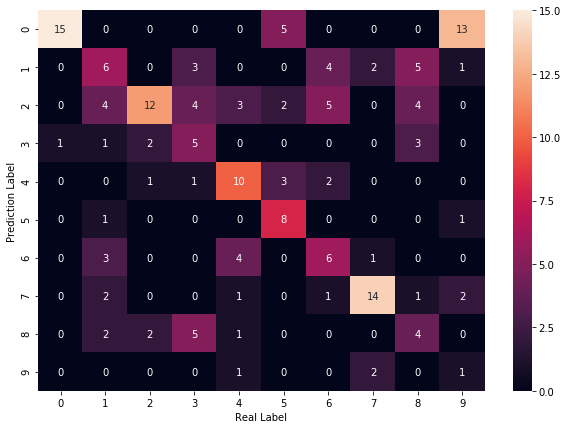

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:0 index:[2] real:5
#1 min_error:0 index:[3] real:2
#2 min_error:1 index:[1 2 3 8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:1 index:[1 2 6] real:1
#5 min_error:0 index:[7] real:7
#6 min_error:1 index:[6 9] real:6
#7 min_error:1 index:[1 2 3 8] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:1 index:[1 2 6] real:1
#10 min_error:1 index:[6 9] real:7
#11 min_error:0 index:[8] real:4
#12 min_error:0 index:[6] real:6
#13 min_error:1 index:[1 2 3 8] real:3
#14 min_error:1 index:[1 2 6] real:1
#15 min_error:1 index:[1 2 3 8] real:3
#16 min_error:0 index:[7] real:9
#17 min_error:0 index:[1] real:1
#18 min_error:0 index:[7] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:1 index:[1 2 3 8] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:1 index:[1 2 3 8] real:3
#23 min_error:1 index:[1 2 6] real:1
#24 min_error:0 index:[4] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:1 index:[1 2 3 8] real:3
#28 min_error:1 index:[5

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.5782312925170068
Avg Base Learner:0.8447742733457019


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.07777777777777778
Accuracy on training set: 0.12777777777777777
Accuracy on training set: 0.24444444444444444
Accuracy on training set: 0.37222222222222223


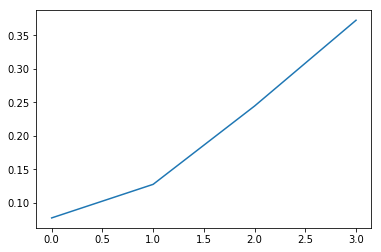

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.07777777777777778,
 0.12777777777777777,
 0.24444444444444444,
 0.37222222222222223]